In [136]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from wordcloud import WordCloud
plt.rcParams["font.family"] = "NanumGothic"

In [137]:
file_path = 'train_x.csv'
data = pd.read_csv(file_path)

In [138]:
data

,Unnamed: 0,0
0,0,"광고,S,B,I,안녕,하,세요,하루하루,힘든,업무,와,스트레스,에,고생,많,으십니다..."
1,1,"광고,koreaXXX,고금리,부채,가계,병들,게,합니다,무료,재무,포토,폴리오,신청..."
2,2,"광고,정확,하,고,올바른,신용,대출,저희,은행,이용,해,주,시,고,사랑,해,주,셔서..."
3,3,"광고,수탁,법인,입니다,하루하루,힘든,업무,와,스트레스,에,고생,많,으십니다,요즘,..."
4,4,"광고,KoreaXXX,무료,재무,포토,폴리오,신청,하,고,미래,플랜,설계,해,보,세..."
...,...,...
13395,13395,"고객,님,안녕,하,세요,지점,입니다,바쁘,신,와중,에,내점,해,주,셔서,진심,으로,..."
13396,13396,"고객,님,힘차,게,달려온,한,주도,고생,많,으셨,습니다,네잎,클로버,행운,뜻,하,고..."
13397,13397,"한,잎,두,잎,나뭇잎,낮,곳,으로,자꾸,내려앉,습니다,세상,에,나누,어,줄,것,많,..."
13398,13398,"언제나,잊,지,않,고,찾,아,주,셔서,감사,합니다,즐거운,저녁,보내,세요,홍제동"


In [139]:
# 데이터의 Column명 바꾸기

data.rename(columns={'Unnamed: 0': 'index'}, inplace=True)
data.rename(columns={'0': 'text'}, inplace=True)

In [140]:
# 중복 값 체크

duplicates = data.duplicated()
duplicate_rows = data[duplicates]
print(duplicate_rows)

Empty DataFrame
Columns: [index, text]
Index: []


In [141]:
# 문자 별 길이

data['text_length'] = data['text'].apply(lambda x: len(x)) # 쉼표를 제거할까 하다가 어차피 띄어쓰기가 있을 자리라서 제거하지 않았음
print("Number of Data:", len(data))
print("")
print(data['text_length'].describe())

Number of Data: 13400

count    13400.000000
mean       228.767388
std        299.293992
min          5.000000
25%         40.000000
50%        100.000000
75%        254.000000
max       1327.000000
Name: text_length, dtype: float64


In [142]:
data

,index,text,text_length
0,0,"광고,S,B,I,안녕,하,세요,하루하루,힘든,업무,와,스트레스,에,고생,많,으십니다...",641
1,1,"광고,koreaXXX,고금리,부채,가계,병들,게,합니다,무료,재무,포토,폴리오,신청...",1045
2,2,"광고,정확,하,고,올바른,신용,대출,저희,은행,이용,해,주,시,고,사랑,해,주,셔서...",929
3,3,"광고,수탁,법인,입니다,하루하루,힘든,업무,와,스트레스,에,고생,많,으십니다,요즘,...",1039
4,4,"광고,KoreaXXX,무료,재무,포토,폴리오,신청,하,고,미래,플랜,설계,해,보,세...",1028
...,...,...,...
13395,13395,"고객,님,안녕,하,세요,지점,입니다,바쁘,신,와중,에,내점,해,주,셔서,진심,으로,...",143
13396,13396,"고객,님,힘차,게,달려온,한,주도,고생,많,으셨,습니다,네잎,클로버,행운,뜻,하,고...",174
13397,13397,"한,잎,두,잎,나뭇잎,낮,곳,으로,자꾸,내려앉,습니다,세상,에,나누,어,줄,것,많,...",184
13398,13398,"언제나,잊,지,않,고,찾,아,주,셔서,감사,합니다,즐거운,저녁,보내,세요,홍제동",44


[('등급', 33), ('상담', 23), ('신용', 20), ('으로', 20), ('가능', 19), ('상품', 15), ('대출', 15), ('금리', 13), ('한도', 13), ('신청', 13), ('습니다', 13), ('은행', 10), ('사용', 10), ('부채', 9), ('이상', 9)]


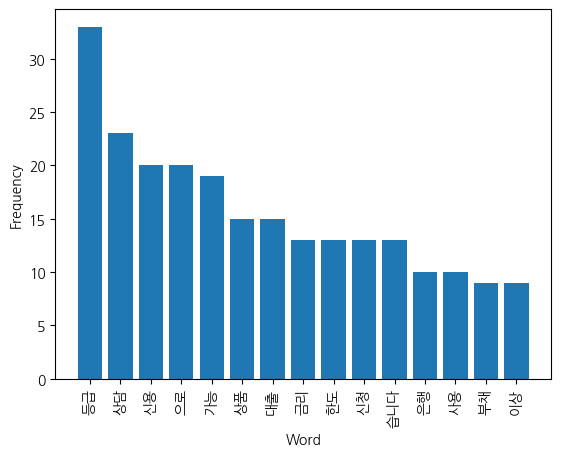

In [143]:
words_list = [word.strip() for text in data['text'] for word in text.split(',')]

# 스팸 문자 단어 빈도 수

spam_data_words = words_list[:1650]
spam_data_words = [word for word in spam_data_words if len(word) > 1] # 두 글자 이상의 단어만 포함
word_counts_spam = Counter(spam_data_words)

# 가장 높은 빈도의 단어 및 빈도수 출력 (상위 15개)
most_common_words = word_counts_spam.most_common(15)
print(most_common_words)

words, counts = zip(*most_common_words)
plt.bar(words, counts)
plt.xticks(rotation=90)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

[('고객', 12195), ('은행', 12144), ('습니다', 10845), ('으로', 10510), ('세요', 9205), ('가능', 8223), ('상품', 7689), ('드립니다', 7537), ('합니다', 7327), ('대출', 6979), ('감사', 6614), ('금리', 6505), ('상담', 6143), ('드리', 5691), ('등급', 5656)]


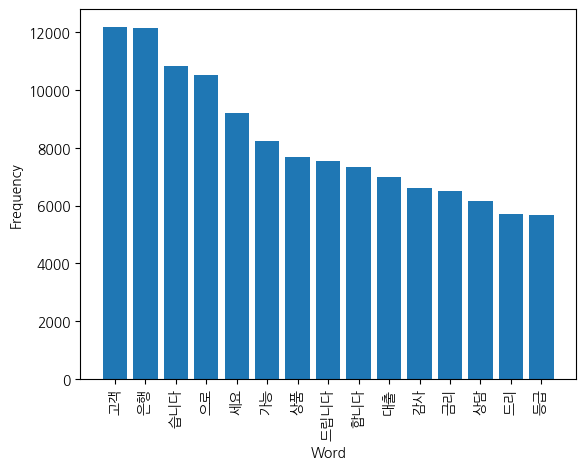

In [144]:
# 정상 문자 단어 빈도 수

normal_data_words = words_list[1650:]
normal_data_words = [word for word in normal_data_words if len(word) > 1] # 두 글자 이상의 단어만 포함
word_counts_normal = Counter(normal_data_words)

# 가장 높은 빈도의 단어 및 빈도수 출력 (상위 15개)
most_common_words = word_counts_normal.most_common(15)
print(most_common_words)

words, counts = zip(*most_common_words)
plt.bar(words, counts)
plt.xticks(rotation=90)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

In [145]:
# 함께 등장한 빈도가 높은 단어 쌍
# 각 문장에서 단어 쌍의 등장 횟수를 계산
# 한 글자짜리 불용어가 너무 많아서 두 글자 이상의 단어만 사용했음

words_list = data['text'].apply(lambda x: x.split(','))
pair_counts_spam = defaultdict(int)
pair_counts_normal = defaultdict(int)

In [146]:
spam_data_words = words_list[:1650]
# 스팸 문자 데이터의 단어 쌍

for words in spam_data_words:
    words = [word for word in words if len(word) > 1] # 두 글자 이상의 단어만 포함
    for i, word1 in enumerate(words):
        for j, word2 in enumerate(words):
            if i < j:
                pair_counts_spam[(word1, word2)] += 1

# 등장 횟수를 기준으로 상위 20개의 단어 쌍을 추출
top_10_pairs = Counter(pair_counts_spam).most_common(10)

print("상위 10개의 단어 쌍:")
for pair, count in top_10_pairs:
    print(f"{pair}: {count}")

상위 10개의 단어 쌍:
('상품', '가능'): 22869
('상품', '으로'): 19002
('금리', '가능'): 18322
('금리', '으로'): 17168
('으로', '가능'): 16248
('대출', '대출'): 15964
('대출', '가능'): 15694
('금리', '상담'): 15576
('상품', '상담'): 15358
('금리', '등급'): 15332


In [147]:
normal_data_words = words_list[1650:]
# 정상 문자 데이터의 단어 쌍
print(len(normal_data_words))
for words in normal_data_words:
    words = [word for word in words if len(word) > 1] # 두 글자 이상의 단어만 포함
    for i, word1 in enumerate(words):
        for j, word2 in enumerate(words):
            if i < j:
                pair_counts_normal[(word1, word2)] += 1

# 등장 횟수를 기준으로 상위 20개의 단어 쌍을 추출
top_10_pairs = Counter(pair_counts_normal).most_common(10)

print("상위 10개의 단어 쌍:")
for pair, count in top_10_pairs:
    print(f"{pair}: {count}")

11750
상위 10개의 단어 쌍:
('고객', '은행'): 10841
('고객', '습니다'): 8843
('고객', '고객'): 8502
('고객', '합니다'): 6744
('고객', '감사'): 6178
('고객', '으로'): 5933
('고객', '세요'): 5424
('고객', '드립니다'): 5365
('고객', '지점'): 5002
('세요', '은행'): 4952


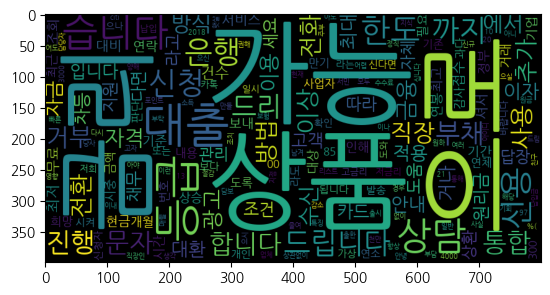

In [148]:
# 단어 빈도수 기반 워드 클라우드 생성

# 스팸 문자
spam_data_words = words_list[:1650]

# 스팸 문자 Wordcloud
spam_list = [word for sublist in spam_data_words for word in sublist if len(word) > 1] # 두 글자 이상의 단어만 포함
spam_word_counts = Counter(spam_list)
spam_wordcloud = WordCloud(font_path='NanumGothic.ttf', width=800, height=400).generate_from_frequencies(spam_word_counts)

# 워드 클라우드 시각화
plt.imshow(spam_wordcloud)

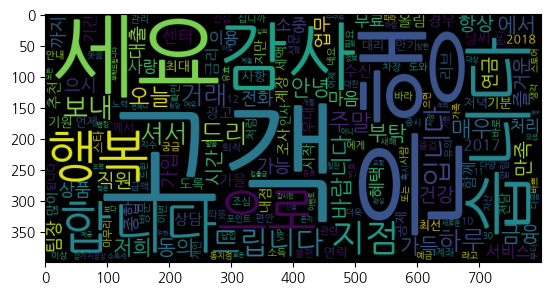

In [149]:
# 정상 문자
normal_data_words = words_list[1650:]

# 정상 문자 Wordcloud
normal_list = [word for sublist in normal_data_words for word in sublist if len(word) > 1] # 두 글자 이상의 단어만 포함
normal_word_counts = Counter(normal_list)
normal_wordcloud = WordCloud(font_path='NanumGothic.ttf', width=800, height=400).generate_from_frequencies(normal_word_counts)

# 워드 클라우드 시각화
plt.imshow(normal_wordcloud)

In [153]:
# 5 Data Instance
# pd.set_option('display.max_colwidth', None) - text를 축약 형태가 아닌 전체로 보고 싶으면 사용
# pd.reset_option('display.max_colwidth') - text를 축약 형태로 보고 싶으면 사용

random_sample = data.sample(n=5)
random_sample['text'] = random_sample['text'].apply(lambda x: x.replace(',', ' '))
random_sample['label'] = random_sample.apply(lambda row: 'Spam Text' if row['index'] < 1650 else 'Normal Text', axis=1)
random_sample


# Interesting Things

# 1. The text vary in length. Based on this, we can analyze the distribution of labels by text-length and determine the relationship between spam and normal text in text-length.
# 2. In WordCloud, we can see that the words that often appear in normal text data and spam text data are slightly different from each other. Based on this, normal text data and spam text data may be distinguished.

,index,text,text_length,label
739,739,광고 안녕 하 세요 여신 영업부 입니다 바쁘 신 와중 에 각종 홍보 전화 와 문자 ...,805,Spam Text
3655,3655,고객 님 어느 덧 10 월 의 마지막 주 네요 이번 달 도 쉴새없이 열심히 달려온 ...,116,Normal Text
1573,1573,광고 은행 상품 안내 안녕 하 세요 저희 에서 신규 상품 출시 되 어 채무 통합 대...,1034,Spam Text
7128,7128,고객 님 고객 님 안녕 하 십니까 저 이번 에 새롭 게 압구정 중앙 지점 으로 부임...,413,Normal Text
9237,9237,소중 한 거래 감사 합니다 꽃 내음 가득 한 4 월 즐거운 달 되 세요 은행,42,Normal Text
